### <font color=black>Problem Statement:The aim of analysis is to identify the root cause of the Revenue loss and recommend ways to improve the situation.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from datetime import datetime
from matplotlib.legend_handler import HandlerLine2D

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing data
uber=pd.read_csv('Uber Request Data.csv')

In [4]:
#Checking imported data
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
#Checking the data
uber.shape
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [6]:
#Since this is a trip specific data, there isn't any need of df.describe() to check satistical proprties.
#The data distribution will be checked at later stages

In [7]:
#Coverting the timestamp columns into datetime format
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'],dayfirst=True)
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'],dayfirst=True)

In [8]:
#Extracting hour from Request timestamp to analyze the data hour-wise
uber['Request hour']=uber['Request timestamp'].dt.hour

In [9]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request hour         6745 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 368.9+ KB


In [10]:
#Checking null values
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Request hour            0
dtype: int64

In [11]:
#It is clear that these null values are in the columns when trips were not completed-i.e. either Cancelled or No cars available
#These clearly can't be imputed because no Driver id or Drop timestamp will exist in such cases
# We will proceed with subsetting the data for appropriate analysis so that missing values don't appear there

<font color=green>**Performing Exploratory Data analytics**

In [12]:
#Checking the Count of trips with respect to Status
uber.groupby(['Status']).Status.count().sort_values(ascending=False)

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

<font color=green>***Note: In entire assignment, To display the count plots, Bar plots are used. To display percentages, Line plots are used.***

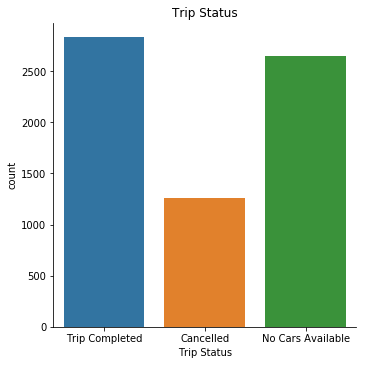

In [13]:
#Plotting the trip status
sns.catplot("Status",data=uber,kind="count")
plt.title("Trip Status",fontsize=12)
plt.xlabel('Trip Status')
plt.ylabel('count')
plt.show()

In [14]:
#Checking the % of trips with respect to Status
can_trip_per=round(100*len(uber.loc[uber['Status']=="Cancelled"])/len(uber.index),2)
na_trip_per=round(100*len(uber.loc[uber['Status']=="No Cars Available"])/len(uber.index),2)
compl_trip=round(100*len(uber.loc[uber['Status']=="Trip Completed"])/len(uber.index),2)
print("Trips completed  :", compl_trip,   "%")  
print("No cars available:", na_trip_per,  "%") 
print("Cancelled trips  :", can_trip_per, "%")

Trips completed  : 41.97 %
No cars available: 39.29 %
Cancelled trips  : 18.74 %


In [15]:
#It is evident that most data is about Trips completed.
#But Non availability of cars is huge 39% of all requests raised and its a major issue.
#~19% trips are Cancelled.
#Non availability of Cars is a major issue for Revenue loss compared to Cancelled trips.
#Let's analyze it in Detail why and When are the Cars not available.

In [16]:
#Checking the percentage of trips taken from City and from Airport
trips_from_airport=round(100*len(uber.loc[(uber['Pickup point']=="Airport")])/len(uber.index),2)
trips_from_city=round(100*len(uber.loc[(uber['Pickup point']=="City")])/len(uber.index),2)
print("Trips from Airport:", trips_from_airport,"%")
print("Trips from City   :", trips_from_city,"%")


Trips from Airport: 48.01 %
Trips from City   : 51.99 %


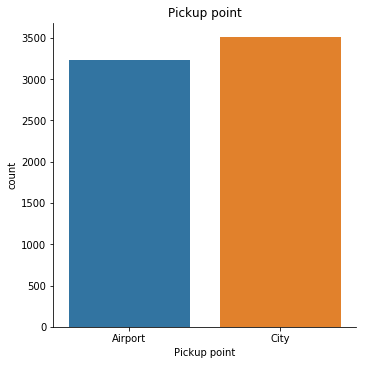

In [17]:
#Plotting the trips for Pickup points
sns.catplot("Pickup point",data=uber,kind="count")
plt.title("Pickup point")
plt.show()

In [18]:
# It is clear that More trips originated from City than Airport

<font color=green>***Creating derived metrics***

In [19]:
#Inserting a trip Duration column (Derived metric) in the dataframe to check if it makes any impact on Revenue loss
uber['Duration_minute']=uber['Drop timestamp']-uber['Request timestamp']
uber['Duration_minute']=uber['Duration_minute']/np.timedelta64(1,'m')
uber['Duration_minute']=round(uber['Duration_minute'],2)

In [20]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Duration_minute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,69.00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,50.00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,41.00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,55.00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,52.52


<font color= green>*Note: "All the trip durations are represented in Minutes in this analysis."*

In [21]:
#uber.to_csv("Trip duration.csv",sep=",")

<font color=green>**Data Analysis**

In [22]:
#Subsetting the master dataframe 'uber' appropriately to analyze different aspects

In [23]:
#Subsetting the master dataframe "uber" as per Status of trips and forming three new dataframes to analyse 
#the reasons separately

<font color=green>***Subset 1:On the Basis of Trip Status-Completed/Cancelled/No Cars***

In [24]:
df_tc=uber.loc[uber['Status']=="Trip Completed"]
df_can=uber.loc[uber['Status']=="Cancelled"]
df_can=df_can.drop(['Drop timestamp','Duration_minute'],axis=1)
df_nc=uber.loc[uber['Status']=="No Cars Available"]
df_nc=df_nc.drop(['Drop timestamp','Duration_minute','Driver id'],axis=1)

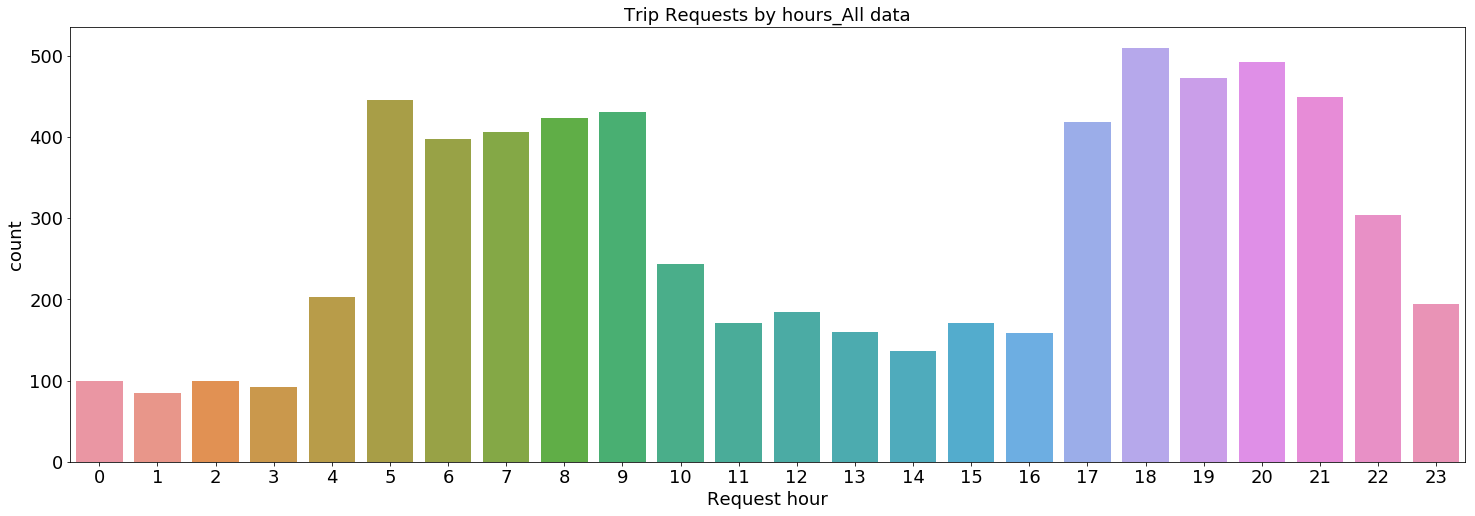

In [25]:
#Checking the Count of Trip Requests against time
plt.figure(figsize=(25, 8))
sns.countplot(uber['Request hour'])
plt.title("Trip Requests by hours_All data",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Request hour',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.show()

In [26]:
#Maximum Requests are made in Early morning and evening hours
#Precisely between 0500-1000 hrs and 1700-2300 hrs.

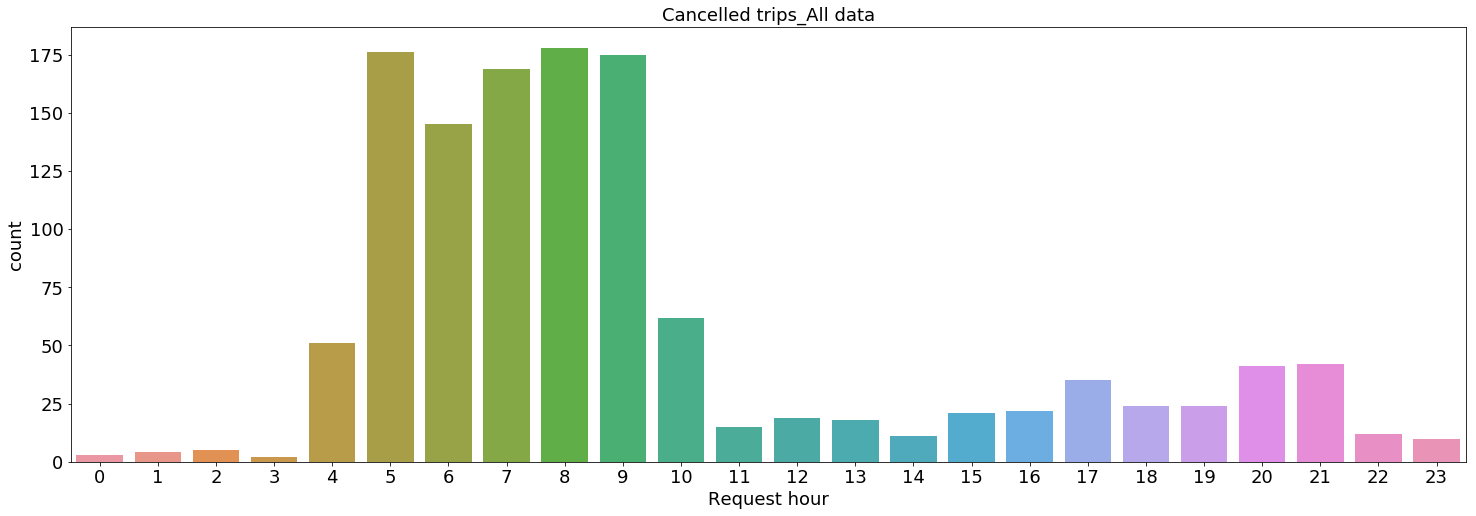

In [27]:
#Plotting the Count of Cancelled trips
plt.figure(figsize=(25, 8))
sns.countplot(df_can['Request hour'])
plt.title("Cancelled trips_All data",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Request hour',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.show()

In [28]:
#Overall maximum trips are Cancelled in 5-9 hrs

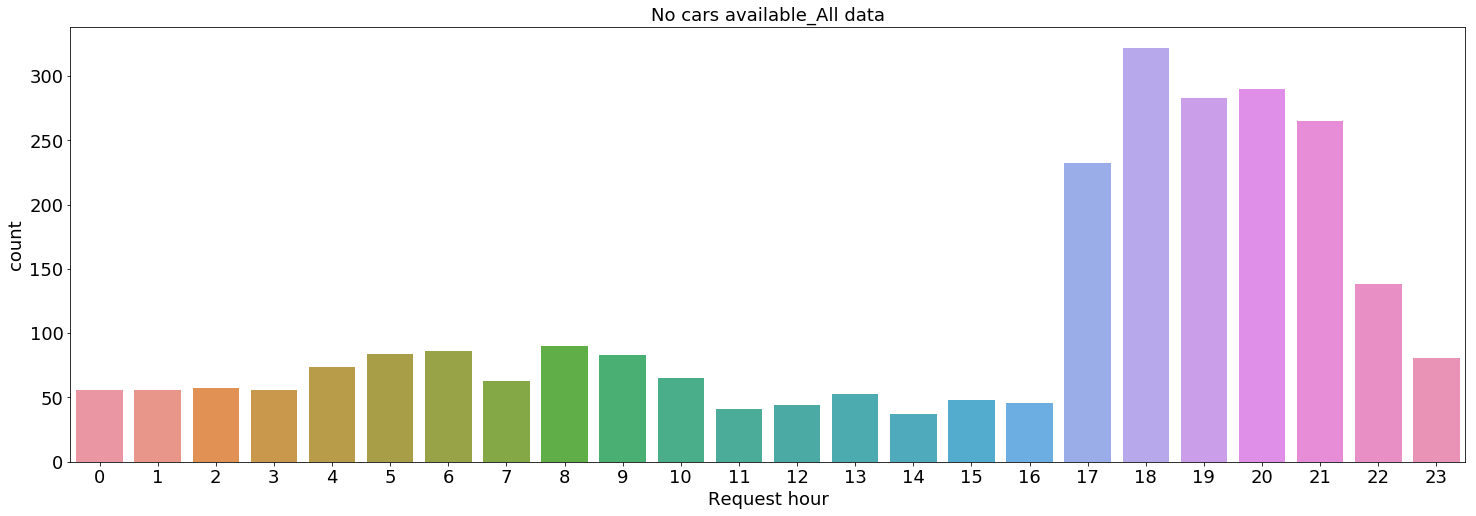

In [29]:
#Plotting the Count of Non availability of cars
plt.figure(figsize=(25, 8))
sns.countplot(df_nc['Request hour'])
plt.title("No cars available_All data",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Request hour',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.show()

In [30]:
#Maximum Non availability of Cars is observed in 1700-2200 hrs

<font color=green>***Subset 2:On the Basis of Pickup location-Airport/City***

In [31]:
#uber_airport: Trips with Pickup point =Airport
#uber_city:    Trips with Pickup point =City
uber_airport=uber.loc[uber['Pickup point']=="Airport"]
uber_city=uber.loc[uber['Pickup point']=="City"]

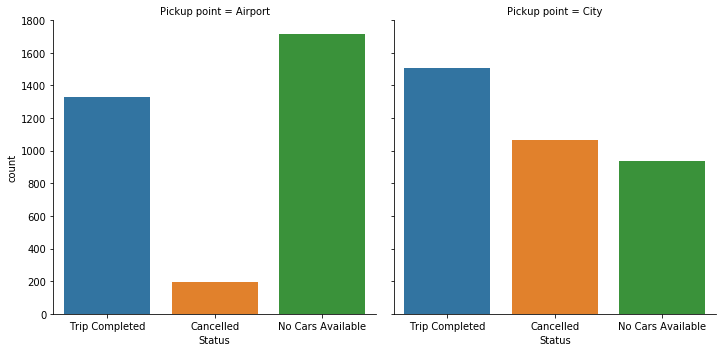

In [32]:
#Checking the trip request status for origin-Airport/City
sns.catplot(x='Status',col='Pickup point', data=uber, kind="count")
plt.show()

In [33]:
#It is clear from above plot that more trips are Cancelled from City 
#whereas Non Availability is higher at airport

In [34]:
#Cancellation from city: More trips are cancelled in 0400-1000 hrs
#Cancellaiton from Airport: Drastically lower Cancellations compared to City. 
#However Cancellations are observed in 1200-2100 hrs

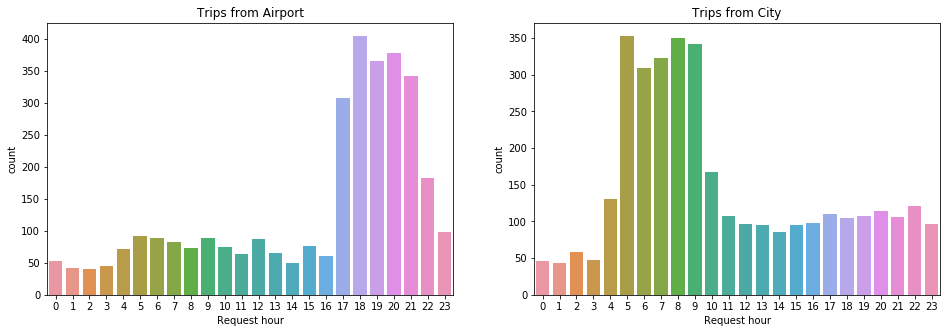

In [35]:
#Checking the Counts of Trips from Airport
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.countplot(uber_airport['Request hour'])
plt.title("Trips from Airport")

plt.subplot(1,2,2)
sns.countplot(uber_city['Request hour'])
plt.title("Trips from City")

plt.show()

In [36]:
#It is clear that maximum Trips are observed in different time periods from City and Airport.
#Also these being different locations, separate analysis is required for the two.
#Subsetting the data based on Pickup location and analyzing in different time slots

In [37]:
#Doing the Demand-Supply gap analysis individually for Pickupoints- Airport and City

<font color=green>**Analyzing the Demand-Supply gap for trips originating from Airport**

<font color=black>***Creating a Gap Dataframe uber_airport_gap***

In [38]:
uber_airport_gap=pd.DataFrame()

In [39]:
uber_airport_tc=uber_airport.loc[uber_airport['Status']=="Trip Completed"]
uber_airport_can=uber_airport.loc[uber_airport['Status']=="Cancelled"]
uber_airport_can=uber_airport_can.drop(['Drop timestamp','Duration_minute'],axis=1)
uber_airport_nc=uber_airport.loc[uber['Status']=="No Cars Available"]
uber_airport_nc=uber_airport_nc.drop(['Drop timestamp','Duration_minute','Driver id'],axis=1)

In [40]:
uber_airport_tc.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Duration_minute
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,69.00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,50.00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,55.00
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,31.52
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,57.72


<font color=blue>***Trip Duration check***

In [41]:
#Analyzing hour wise trip time to check suitability of Average or Median to find out relation between revenue loss and trip time
uber_airport_triptime=pd.DataFrame()
uber_airport_triptime['Minimum trip time']=uber_airport_tc.groupby('Request hour').Duration_minute.min().sort_index(ascending=True)
uber_airport_triptime['Maximum trip time']=uber_airport_tc.groupby('Request hour').Duration_minute.max().sort_index(ascending=True)
uber_airport_triptime['Average trip time']=uber_airport_tc.groupby('Request hour').Duration_minute.mean().sort_index(ascending=True)
uber_airport_triptime['Median trip time']=uber_airport_tc.groupby('Request hour').Duration_minute.median().sort_index(ascending=True)
uber_airport_triptime.reset_index(inplace=True)

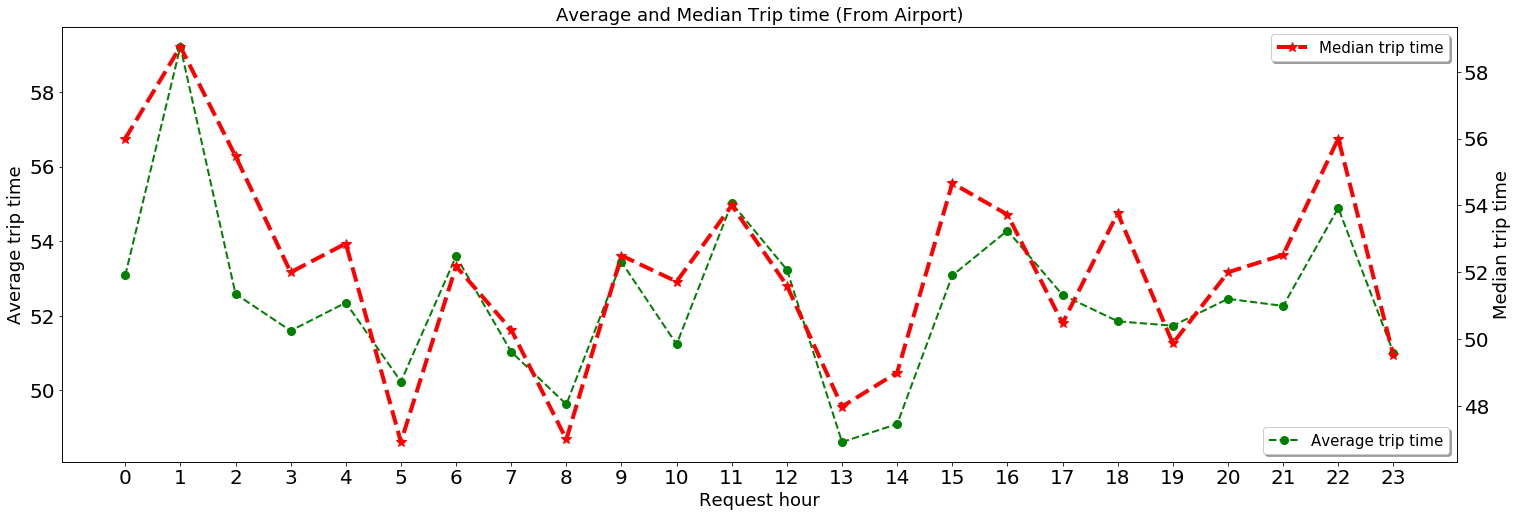

In [42]:
#Checking the difference between Average and Median trip time
fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(111) 
plt.xticks(np.arange(0, 24, 1),fontsize=20)
plt.yticks(fontsize=20)
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
plt.xticks(np.arange(0, 24, 1),fontsize=20)
plt.yticks(fontsize=20)

p1=uber_airport_triptime.plot('Request hour','Average trip time' ,kind='line', color='green', ax=ax,linestyle='--', marker='o',linewidth=2.0,markersize=8,label="Average trip time",legend=True).legend(loc='lower right',shadow='True',fontsize=15)
p2=uber_airport_triptime.plot('Request hour','Median trip time',kind='line', color='red', ax=ax2,linestyle='--' ,marker='*',linewidth=4.0,markersize=10,label="Median trip time",legend=True).legend(loc='upper right',shadow='True',fontsize=15)
ax.set_xlabel('Request hour',fontsize=18)
ax.set_ylabel('Average trip time',fontsize=18)
ax2.set_ylabel('Median trip time',fontsize=18)
plt.title("Average and Median Trip time (From Airport)",fontsize=18)
plt.show()

In [43]:
#It is evident from above plot that-There is not much difference in Average and Median trip times.
#Both are directionally moving almost same.
#The maximum difference is of ~4 minutes but that's very less for a driver to cancel a trip because of high trip duration.
#Also, it is clear from uber_airport_triptime dataframe that Minimum triptime is in 20-30 minute range at every hour and
#maximum trip time is in 75-80 minute range for every hour
#Hence it will be appropriate to use Average for analysis of trip-time impact on Revenue loss, If any.

<font color=green> ***Creating Datframe "uber_airport_gap" for Demand-Supply gap analysis of trips from Airport
,Creating derived metrics- (Demand-Supply) and % of trips incomplete***

In [44]:
uber_airport_gap['Trips_duration']=round(uber_airport_tc.groupby('Request hour').Duration_minute.mean().sort_index(ascending=True),2)
uber_airport_gap['Trips_completed']=uber_airport_tc.groupby('Request hour').Status.count().sort_index(ascending=True)
uber_airport_gap['Cancelled']=uber_airport_can.groupby('Request hour').Status.count().sort_index(ascending=True)
uber_airport_gap['No_cars']=uber_airport_nc.groupby('Request hour').Status.count().sort_index(ascending=True)

In [45]:
#uber_airport_gap

In [46]:
uber_airport_gap=uber_airport_gap.fillna(0)
uber_airport_gap.reset_index(inplace=True)

<font color=green>***creating time slots***

In [47]:
#following are the time slots based on Request hours:
#0000-0400:Late Night
#0500-0700:early morning
#0800-1100:morning
#1200-1500:afternoon
#1600-1800:evening
#1900-2000:Late evening
#2100-2300:Night

In [48]:
uber_airport_gap['Time slot']=pd.cut(uber_airport_gap['Request hour'],[-1,4,7,11,15,18,20,23],labels=['Late Night','Early morning','Morning','Afternoon','Evening','Late Evening','Night'])

In [49]:
uber_airport_gap

,Request hour,Trips_duration,Trips_completed,Cancelled,No_cars,Time slot
0,0,53.08,23,0.0,30,Late Night
1,1,59.21,13,0.0,29,Late Night
2,2,52.59,16,0.0,25,Late Night
3,3,51.60,15,0.0,30,Late Night
4,4,52.35,36,2.0,34,Late Night
5,5,50.23,85,4.0,3,Early morning
6,6,53.59,81,4.0,4,Early morning
7,7,51.03,75,5.0,3,Early morning
8,8,49.62,67,2.0,4,Morning
9,9,53.44,74,8.0,7,Morning


In [50]:
#Demand Supply Gap is Basically Requests unfulfilled
uber_airport_gap['Gap']=(uber_airport_gap['No_cars']+uber_airport_gap['Cancelled'])

In [51]:
uber_airport_gap.head(2)

,Request hour,Trips_duration,Trips_completed,Cancelled,No_cars,Time slot,Gap
0,0,53.08,23,0.0,30,Late Night,30.0
1,1,59.21,13,0.0,29,Late Night,29.0


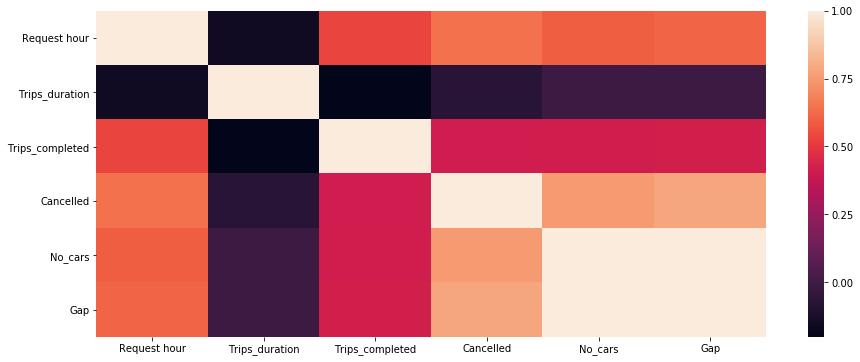

In [52]:
#Checking the parameters correlation for trips from Airport
corr=uber_airport_gap.corr()
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

In [53]:
#The above plot shows that there is correlation between Request hour and Cancellation,Trips completion and cars availability.
#Analyzing this relationship in detail

<font color=blue>**Note :It is clear that trip duration is having a very thin correlation with Trip completion, Cancellation and Cars availability.**

In [54]:
airport_gap=uber_airport_gap.pivot_table(index='Time slot',values=['Trips_completed','Cancelled','No_cars','Gap','Trips_duration'],aggfunc={'Trips_completed':np.sum,'Cancelled':np.sum,'No_cars':np.sum,'Gap':np.sum,'Trips_duration':np.mean})

In [55]:
airport_gap

,Cancelled,Gap,No_cars,Trips_completed,Trips_duration
Time slot,,,,,
Late Night,2.0,150.0,148,103,53.766000
Early morning,13.0,23.0,10,241,51.616667
Morning,24.0,58.0,34,243,52.327500
Afternoon,36.0,91.0,55,187,51.005000
Evening,48.0,581.0,533,193,52.896667
Late Evening,44.0,587.0,543,157,52.090000
Night,31.0,421.0,390,203,52.720000


In [56]:
airport_gap['Gap %']=round(100*(airport_gap['Gap'])/(airport_gap['Trips_completed']+airport_gap['Gap']),2)

In [57]:
airport_gap.reset_index(inplace=True)

In [58]:
airport_gap['Demand']=airport_gap['Trips_completed']+airport_gap['Cancelled']+airport_gap['No_cars']

In [59]:
airport_gap['Supply']=airport_gap['Trips_completed']

In [60]:
airport_gap['Trips_duration']=round(airport_gap['Trips_duration'],2)

In [61]:
airport_gap

,Time slot,Cancelled,Gap,No_cars,Trips_completed,Trips_duration,Gap %,Demand,Supply
0,Late Night,2.0,150.0,148,103,53.77,59.29,253.0,103
1,Early morning,13.0,23.0,10,241,51.62,8.71,264.0,241
2,Morning,24.0,58.0,34,243,52.33,19.27,301.0,243
3,Afternoon,36.0,91.0,55,187,51.00,32.73,278.0,187
4,Evening,48.0,581.0,533,193,52.90,75.06,774.0,193
5,Late Evening,44.0,587.0,543,157,52.09,78.90,744.0,157
6,Night,31.0,421.0,390,203,52.72,67.47,624.0,203


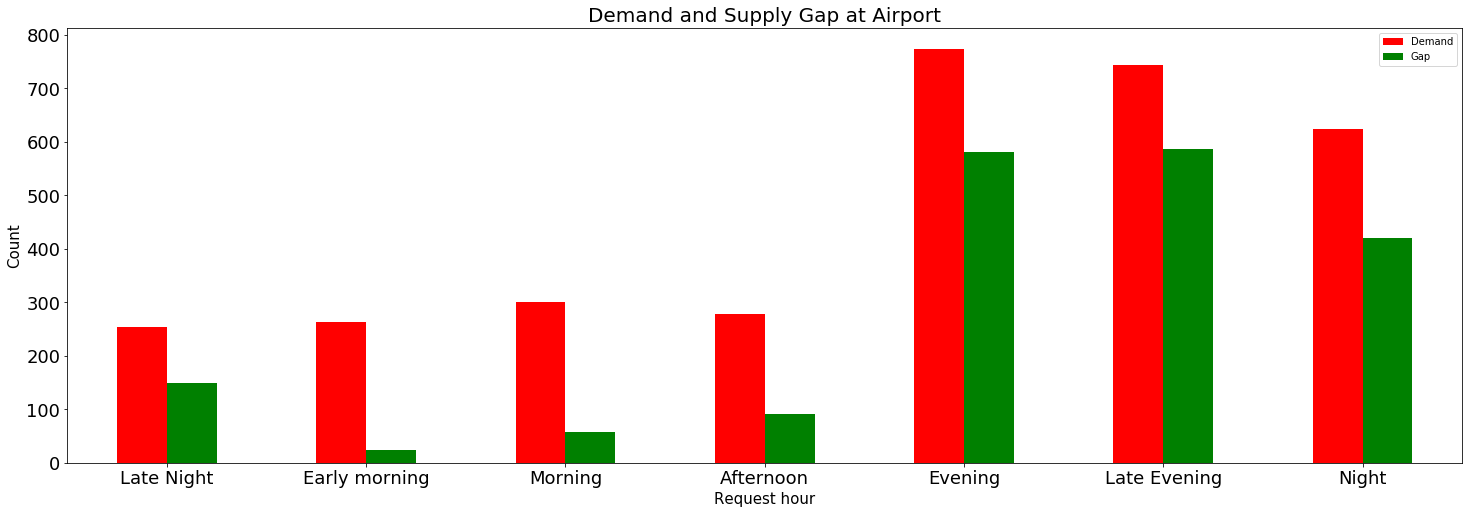

In [62]:
#Plotting the Summary of trips by Status per Request hour
airport_gap.plot(x="Time slot", y=["Demand","Gap"],figsize=(25,8),kind="bar",colors={'red','green'})
plt.title("Demand and Supply Gap at Airport",fontsize=20)
plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Request hour',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [63]:
#Demand-Supply gap is highest in Evening,Late evening and Night at Airport

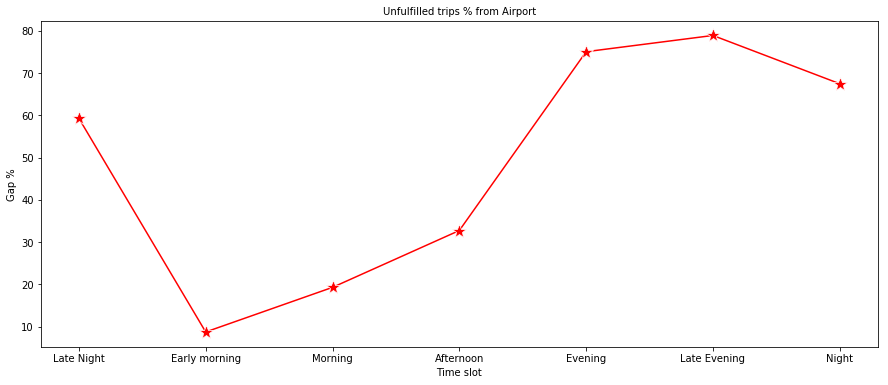

In [64]:
#Plotting the Demand-Supply gap of trips originating from Airport
plt.figure(figsize=(15,6))
sns.lineplot(x="Time slot",y="Gap %" , marker="*",markersize=15,data=airport_gap,color="red")
plt.title("Unfulfilled trips % from Airport",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Time slot',fontsize=10)
plt.ylabel('Gap %',fontsize=10)
plt.show()

In [65]:
#It is clear that Demand-Supply Gap is higher during Midnight-0400 hrs and 1700-2200 hrs at Airport
#This needs to be further brokedn down to check if this is caused by Non availability or Cancellation

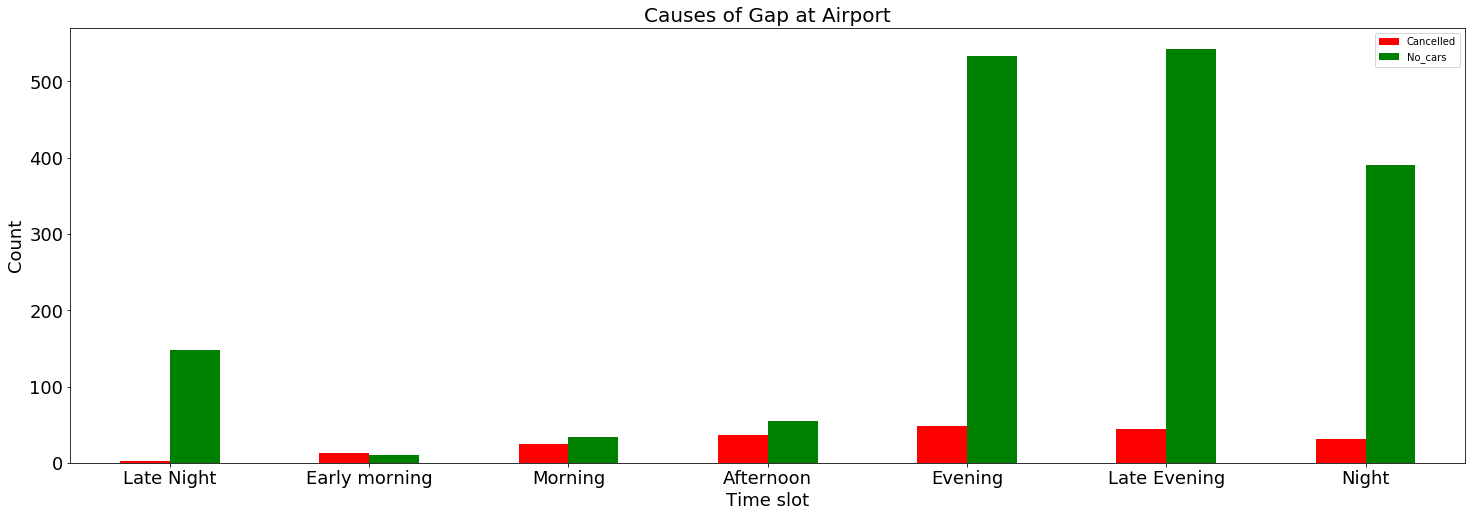

In [66]:
#Plotting the Summary of trips by Status per Request hour
airport_gap.plot(x="Time slot", y=["Cancelled", "No_cars"], figsize=(25,8),kind="bar",colors={'red','green'})
plt.title("Causes of Gap at Airport",fontsize=20)
plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Time slot',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.show()

In [67]:
#It is clear from above plot that during Evening,Late Evening and Night, Non Availability of Cars is a Major issue at Airport.
#Trip Cancellation is a very small number compared to this 
#Trip cancellation is more prominent in same period. Its worth noting that Maximum trips from Airport is generated in same time. 
#The reason of Maximum Cancellation maybe-Drivers accept the trip but the Drop point is
#very far from the Airport and they come to know of it after trip acceptance. Now if they don't wish to go, Trip is Cancelled,
#Hence the Higher Cancellations

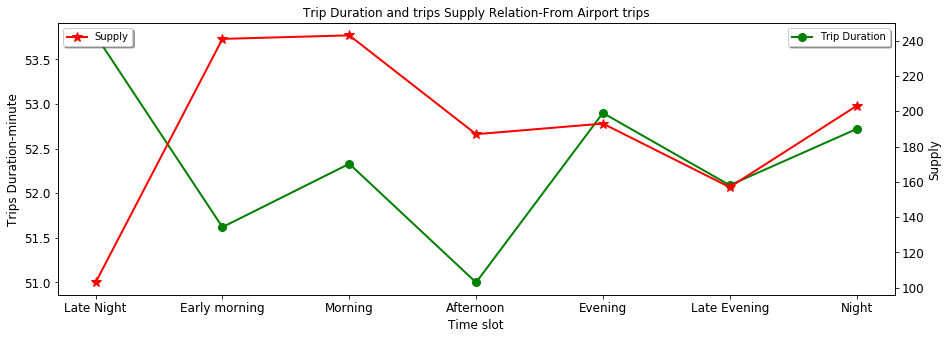

In [68]:
#For from Airport trips, Plotting the graph of trips supply and Trip Duration against Time slot to Check
#if there is any relation between trip duration and supply
fig = plt.figure(figsize=(15,5))
# Create matplotlib figure

ax = fig.add_subplot(111)
plt.xticks(np.arange(0, 24, 1),fontsize=12)
plt.yticks(fontsize=12)
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
plt.xticks(np.arange(0, 24, 1),fontsize=12)
plt.yticks(fontsize=12)

p1=airport_gap.plot('Time slot','Trips_duration' ,kind='line', color='green', ax=ax,linestyle='-', marker='o',linewidth=2.0,markersize=8,label="Trip Duration",legend=True).legend(loc='upper right',shadow='True',fontsize=10)
p2=airport_gap.plot('Time slot','Supply',kind='line', color='red', ax=ax2,linestyle='-' ,marker='*',linewidth=2.0,markersize=10,label="Supply",legend=True).legend(loc='upper left',shadow='False',fontsize=10)
ax.set_xlabel('Time slot',fontsize=12)
ax.set_ylabel('Trips Duration-minute',fontsize=12)
ax2.set_ylabel('Supply',fontsize=12)
plt.title("Trip Duration and trips Supply Relation-From Airport trips",fontsize=12)

plt.show()

In [69]:
#Firstly Average Trip Duration doesn't vary greatly against hours. The range is just ~4 minute which is not a Trip making or breaking point for Driver partner.
#Meaning he wont Cancel a trip because of 4 minute Trip time difference.
#No defining relationship exists between Trip Duration and Cancellation

In [70]:
#Checking correlation coeeficient of Trip duration and supply
round(airport_gap['Trips_duration'].corr(airport_gap['Supply']),2)

-0.54

In [71]:
#If trip duration increases, Supply should decrease as drivers won't be willing to driver longer
#moderate negative correlation exists between the two

In [110]:
#To show the relationship between (Trip duration in minute and Supply, line plot is used for better visualisation of increase and decrease.

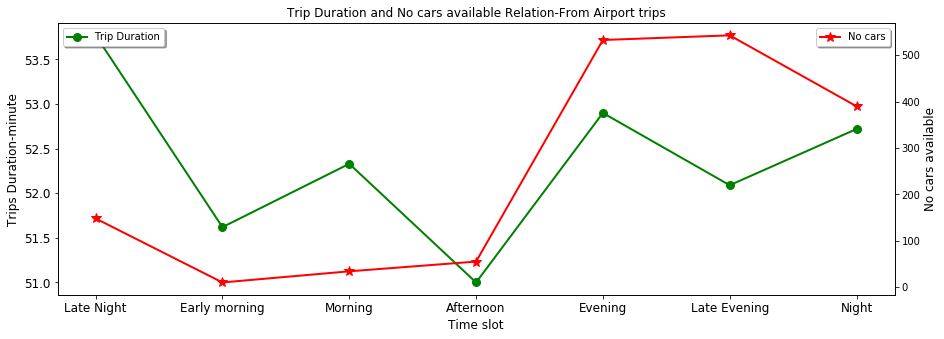

In [72]:
#For from Airport trips,Plotting the graph of No cars available and Trip Duration against Request hour to Check the dependency if 
#there is any relation between trip duration and No cars available
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(111) 
plt.xticks(np.arange(0, 24, 1),fontsize=12)
plt.yticks(fontsize=12)
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
plt.xticks(np.arange(0, 24, 1),fontsize=12)
plt.yticks(fontsize=10)

p1=airport_gap.plot('Time slot','Trips_duration' ,kind='line', color='green', ax=ax,linestyle='-', marker='o',linewidth=2.0,markersize=8,label="Trip Duration",legend=True).legend(loc='upper left',shadow='True',fontsize=10)
p2=airport_gap.plot('Time slot','No_cars',kind='line', color='red', ax=ax2,linestyle='-' ,marker='*',linewidth=2.0,markersize=10,label="No cars",legend=True).legend(loc='upper right',shadow='True',fontsize=10)
ax.set_xlabel('Time slot',fontsize=12)
ax.set_ylabel('Trips Duration-minute',fontsize=12)
ax2.set_ylabel('No cars available',fontsize=12)
plt.title("Trip Duration and No cars available Relation-From Airport trips",fontsize=12)

plt.show()

In [73]:
#correlation coefficient between Trip duration and Cancellation
round(airport_gap['Trips_duration'].corr(airport_gap['Cancelled']),2)

-0.32

In [74]:
#Negative correlaiton implies As Duration increases, Cancellations decrease. Ideally as Trip duration increases, drivers would be 
#prone to cancel more. So ruled out

In [75]:
round(airport_gap['Trips_duration'].corr(airport_gap['No_cars']),2)

0.33

In [76]:
#weak relationship exists between Trip duration and Non availability of Cars

<font color=green>**Analyzing the Demand-Supply gap for trips originating from City**

<font color=black>***Creating a Gap Dataframe uber_city_gap***

In [77]:
uber_city_gap=pd.DataFrame()

In [78]:
uber_city_tc=uber_city.loc[uber_city['Status']=="Trip Completed"]
uber_city_can=uber_city.loc[uber_city['Status']=="Cancelled"]
uber_city_can=uber_city_can.drop(['Drop timestamp','Duration_minute'],axis=1)
uber_city_nc=uber_city.loc[uber['Status']=="No Cars Available"]
uber_city_nc=uber_city_nc.drop(['Drop timestamp','Duration_minute','Driver id'],axis=1)


<font color=blue>***Trip Duration check***

In [79]:
#Analyzing hour wise trip time to check suitability of Average or Median to find out relation between revenue loss and trip time
uber_city_triptime=pd.DataFrame()
uber_city_triptime['Minimum trip time']=uber_city_tc.groupby('Request hour').Duration_minute.min().sort_index(ascending=True)
uber_city_triptime['Maximum trip time']=uber_city_tc.groupby('Request hour').Duration_minute.max().sort_index(ascending=True)
uber_city_triptime['Average trip time']=uber_city_tc.groupby('Request hour').Duration_minute.mean().sort_index(ascending=True)
uber_city_triptime['Median trip time']=uber_city_tc.groupby('Request hour').Duration_minute.median().sort_index(ascending=True)
uber_city_triptime.reset_index(inplace=True)
uber_city_triptime

,Request hour,Minimum trip time,Maximum trip time,Average trip time,Median trip time
0,0,30.35,77.80,54.652941,61.000
1,1,35.00,82.90,55.660000,52.735
2,2,27.00,74.00,53.442381,54.800
3,3,32.00,73.00,51.143158,49.980
4,4,33.00,79.93,55.735238,59.000
5,5,24.30,78.83,52.677000,54.335
6,6,29.92,76.85,54.507209,55.505
7,7,21.00,80.27,53.818687,56.230
8,8,24.85,77.00,51.852955,53.050
9,9,24.57,81.00,53.373636,55.000


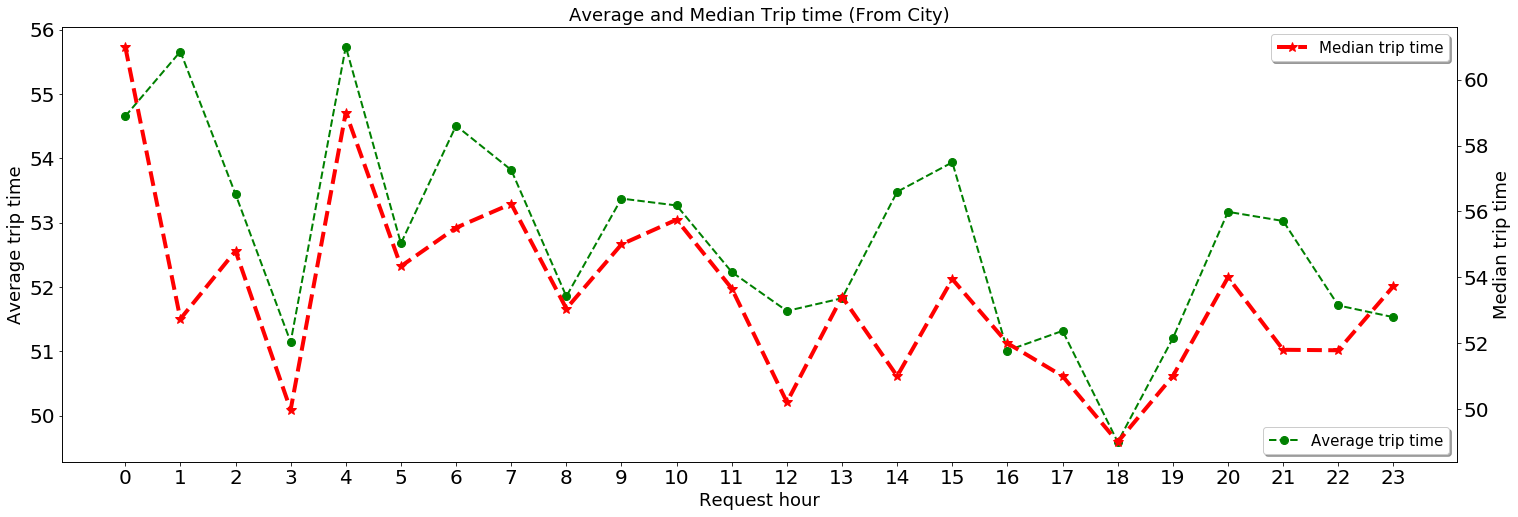

In [80]:
#Checking the difference between Average and Median trip time
fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(111) # Create matplotlib axes
plt.xticks(np.arange(0, 24, 1),fontsize=20)
plt.yticks(fontsize=20)
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
plt.xticks(np.arange(0, 24, 1),fontsize=20)
plt.yticks(fontsize=20)

p1=uber_city_triptime.plot('Request hour','Average trip time' ,kind='line', color='green', ax=ax,linestyle='--', marker='o',linewidth=2.0,markersize=8,label="Average trip time",legend=True).legend(loc='lower right',shadow='True',fontsize=15)
p2=uber_city_triptime.plot('Request hour','Median trip time',kind='line', color='red', ax=ax2,linestyle='--' ,marker='*',linewidth=4.0,markersize=10,label="Median trip time",legend=True).legend(loc='upper right',shadow='True',fontsize=15)
ax.set_xlabel('Request hour',fontsize=18)
ax.set_ylabel('Average trip time',fontsize=18)
ax2.set_ylabel('Median trip time',fontsize=18)
plt.title("Average and Median Trip time (From City)",fontsize=18)
plt.show()

In [81]:
#It is evident that There is not much difference in Average and Median trip times.
#Both are directinally moving almost same.
#The maximum difference is of 4 minutes but thats very less for a driver to cancel a trip because of high trip duration.
#Also, it is clear from uber_city_triptime dataframe that Minimum triptime is in 25-30 minute range at every hour and
#maximum trip time is at 75-80 minute range for every hour
#Hence it will be appropriate to use Average for analysis of trip time impact on Revenue loss, If any.

In [82]:
uber_city_gap['Trips_duration']=uber_city_tc.groupby('Request hour').Duration_minute.mean().sort_index(ascending=True)
uber_city_gap['Trips_completed']=uber_city_tc.groupby('Request hour').Status.count().sort_index(ascending=True)
uber_city_gap['Cancelled']=uber_city_can.groupby('Request hour').Status.count().sort_index(ascending=True)
uber_city_gap['No_cars']=uber_city_nc.groupby('Request hour').Status.count().sort_index(ascending=True)
uber_city_gap['Gap']=(uber_city_gap['No_cars']+uber_city_gap['Cancelled'])

In [83]:
uber_city_gap.reset_index(inplace=True)

<font color=green>***creating time slots***

In [84]:
#following are the time slots based on Request hours:
#0000-0400:Late Night
#0500-0700:early morning
#0800-1100:morning
#1200-1500:afternoon
#1600-1800:evening
#1900-2000:Late evening
#2100-2300:Night

In [85]:
uber_city_gap['Time slot']=pd.cut(uber_city_gap['Request hour'],[-1,4,7,11,15,18,20,23],labels=['Late Night','Early morning','Morning','Afternoon','Evening','Late Evening','Night'])

In [86]:
uber_city_gap

,Request hour,Trips_duration,Trips_completed,Cancelled,No_cars,Gap,Time slot
0,0,54.652941,17,3,26,29,Late Night
1,1,55.660000,12,4,27,31,Late Night
2,2,53.442381,21,5,32,37,Late Night
3,3,51.143158,19,2,26,28,Late Night
4,4,55.735238,42,49,40,89,Late Night
5,5,52.677000,100,172,81,253,Early morning
6,6,54.507209,86,141,82,223,Early morning
7,7,53.818687,99,164,60,224,Early morning
8,8,51.852955,88,176,86,262,Morning
9,9,53.373636,99,167,76,243,Morning


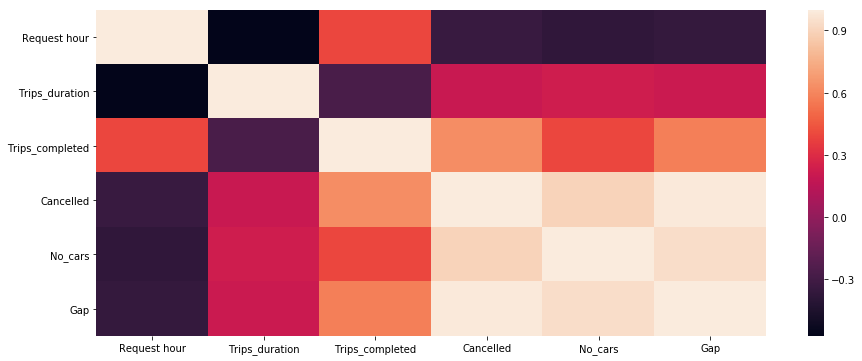

In [87]:
#Checking the parameters correlation for trips from Airport
corr=uber_city_gap.corr()
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

In [88]:
#The above plot shows that there is correlation between Request hour and Cancellation,Trips completion and cars availability.
#Analyzing this relationship in detail

<font color=blue>**Note :It is clear that trip duration is having a very thin correlation with Trip completion, Cancellation and Cars availability.**

In [89]:
city_gap=uber_city_gap.pivot_table(index='Time slot',values=['Trips_completed','Cancelled','No_cars','Gap','Trips_duration'],aggfunc={'Trips_completed':np.sum,'Cancelled':np.sum,'No_cars':np.sum,'Gap':np.sum,'Trips_duration':np.mean})

In [90]:
city_gap['Gap %']=round(100*(city_gap['No_cars']+city_gap['Cancelled'])/(city_gap['Trips_completed']+city_gap['No_cars']+city_gap['Cancelled']),2)

In [91]:
city_gap.reset_index(inplace=True)

In [92]:
city_gap

,Time slot,Cancelled,Gap,No_cars,Trips_completed,Trips_duration,Gap %
0,Late Night,63,214,151,111,54.126744,65.85
1,Early morning,477,700,223,285,53.667632,71.07
2,Morning,406,651,245,316,52.681078,67.32
3,Afternoon,33,160,127,213,52.716344,42.90
4,Evening,33,100,67,213,50.638381,31.95
5,Late Evening,21,51,30,170,52.184456,23.08
6,Night,33,127,94,196,52.088691,39.32


In [93]:
#uber_city_gap.to_csv("uber city gap.csv",sep=",")

In [94]:
city_gap['Demand']=city_gap['Trips_completed']+city_gap['Cancelled']+city_gap['No_cars']

In [95]:
city_gap['Supply']=city_gap['Trips_completed']

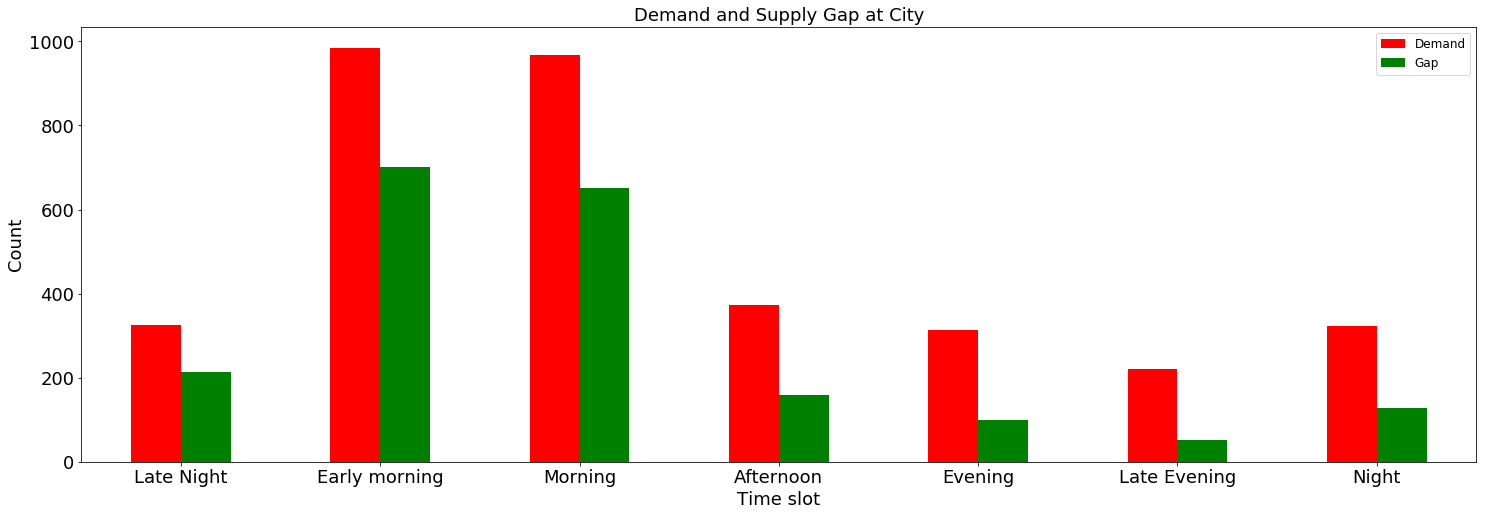

In [96]:
#Plotting a Summary by Trip Status for trips originating from City
city_gap.plot(x="Time slot", y=["Demand", "Gap"], figsize=(25,8),kind="bar",colors=['red','green']).legend(fontsize=12)
plt.title("Demand and Supply Gap at City",fontsize=18)
plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Time slot',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.show()

In [97]:
#Maximum Trips are taken from City in Early morning and morning hours
#Maximum Cancellation and Non availability of cars is also during the same time slots
#This might be caused due to the fact that-
#Cancellations happen because Driver accepts trip but Pickup location is very far from him and then he cancels
#Non availability of Cars in early morning hours is a Major issue and that needs to be addressed as the demand seems to be very high during Early morning
#hours

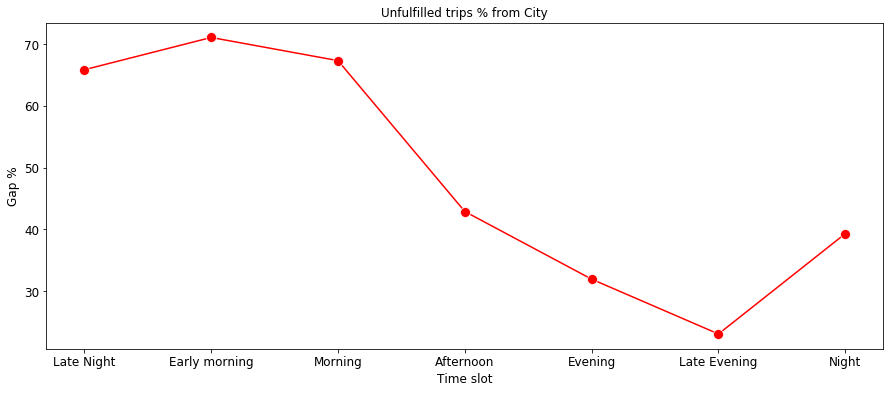

In [98]:
#Plotting the Demand-Supply gap of trips originating from City
plt.figure(figsize=(15,6))
sns.lineplot(x="Time slot",y="Gap %" , marker="o",markersize=10,data=city_gap,color="red")
plt.title("Unfulfilled trips % from City",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time slot',fontsize=12)
plt.ylabel('Gap %',fontsize=12)
plt.show()

In [99]:
#Maximum Trips are unfulfilled during Late night, early morning and morning hours
#Further breakdown is necessary to see if reason is more of Cancellation or Non availability

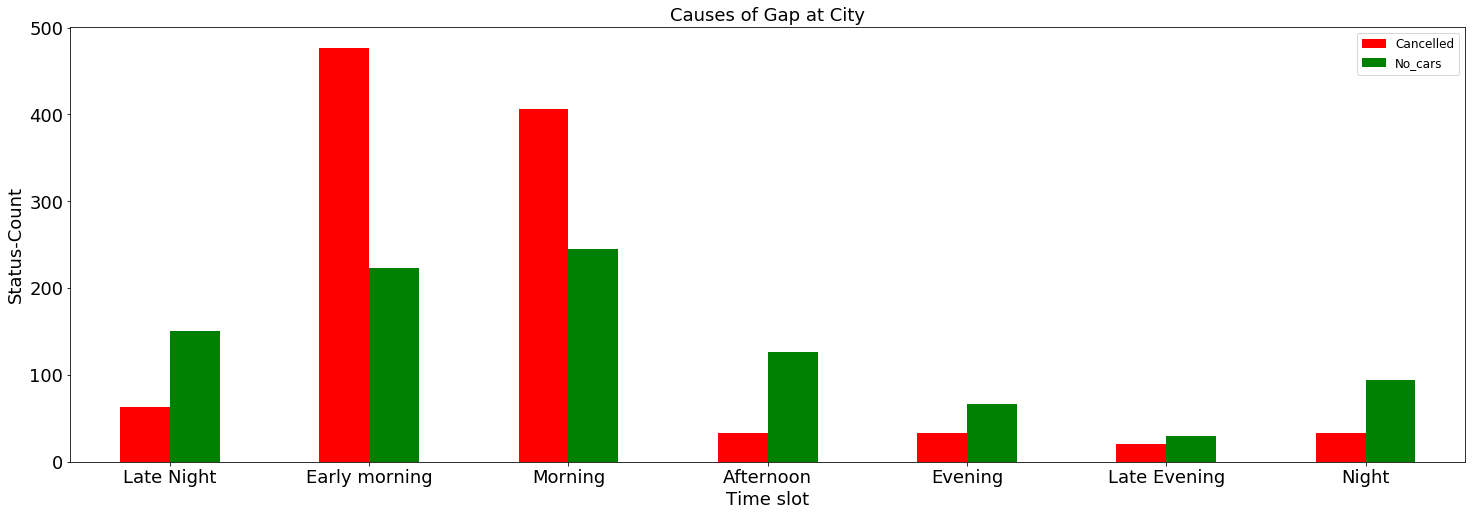

In [100]:
#Plotting a Summary by Trip Status for trips originating from City
city_gap.plot(x="Time slot", y=["Cancelled", "No_cars"], figsize=(25,8),kind="bar",colors={'green','red'}).legend(fontsize=12)
plt.title("Causes of Gap at City",fontsize=18)
plt.xticks(fontsize=18,rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Time slot',fontsize=18)
plt.ylabel('Status-Count',fontsize=18)
plt.show()

In [101]:
#Non availability of Cars is a Major issue in City. Though prominent in morning hours, its still spread during all hours.
#This maybe due to Less number of Cars
#Cancellation maybe due to unwillingness of Drivers to go to Airport in Early morning hours
#This maybe due to the fact that during these hours the Trips from Airport are comparatively lesser

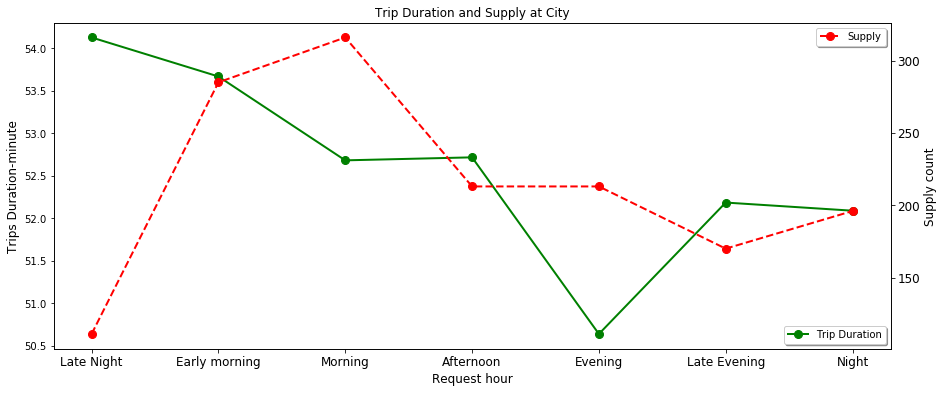

In [102]:
#For from City trips, Plotting the graph of Cancelled trips and Trip Duration against Request hour to Check the dependency if
#there is any relation between trip duration and trip cancellation
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(111) # Create matplotlib axes
plt.xticks(np.arange(0, 24, 1),fontsize=12)
plt.yticks(fontsize=10)
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
plt.xticks(np.arange(0, 24, 1),fontsize=12)
plt.yticks(fontsize=12)


p1=city_gap.plot('Time slot','Trips_duration' ,kind='line', color='green', ax=ax,linestyle='-', marker='o',linewidth=2.0,markersize=8,label="Trip Duration",legend=True).legend(loc='lower right',shadow='True',fontsize=10)
p2=city_gap.plot('Time slot','Supply',kind='line', color='red', ax=ax2,linestyle='--' ,marker='o',linewidth=2.0,markersize=8,label="Supply",legend=True).legend(loc='upper right',shadow='True',fontsize=10)
ax.set_xlabel('Request hour',fontsize=12)
ax.set_ylabel('Trips Duration-minute',fontsize=12)
ax2.set_ylabel('Supply count',fontsize=12)
plt.title("Trip Duration and Supply at City",fontsize=12)

plt.show()

In [103]:
#Checking correlation coeeficient of Trip duration and supply
round(city_gap['Trips_duration'].corr(city_gap['Supply']),2)

-0.09

In [104]:
#A very thin negative correlation

In [105]:
round(city_gap['Trips_duration'].corr(city_gap['Cancelled']),2)

0.42

In [106]:
round(city_gap['Trips_duration'].corr(city_gap['No_cars']),2)

0.6

In [107]:
#Ideally if Trip duration is increasing, Cancellations must increase
#a weak correlation exists between cancellaiton and duration
#Also the range of Average Trip duration is just 5 minute which is a very less time for any Driver to consider Cancellation

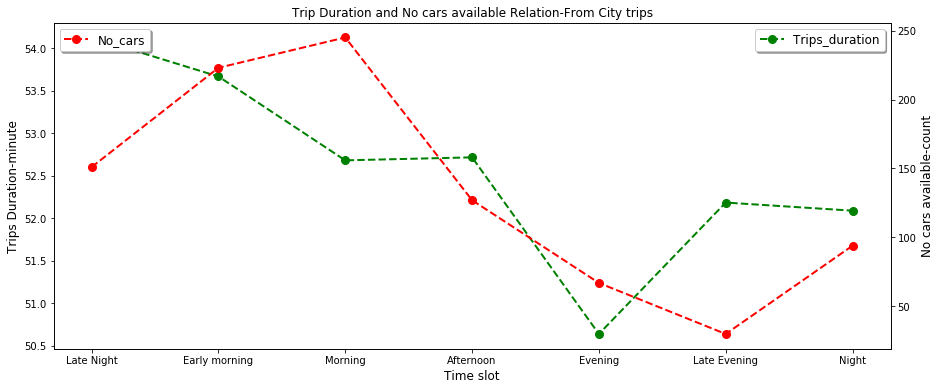

In [108]:
#For from City trips,Plotting the graph of No cars available and Trip Duration against Request hour to Check the dependency if 
#there is any relation between trip duration and No cars available
fig = plt.figure(figsize=(15,6))
# Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
plt.xticks(np.arange(0, 24, 1),fontsize=10)
plt.yticks(fontsize=10)
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
plt.xticks(np.arange(0, 24, 1),fontsize=10)
plt.yticks(fontsize=10)
city_gap.plot('Time slot','Trips_duration' ,kind='line', color='green', ax=ax,linestyle='--', marker='o',linewidth=2.0,markersize=8).legend(loc='upper right',shadow='False',fontsize=12)
city_gap.plot('Time slot','No_cars',kind='line', color='red', ax=ax2,linestyle='--' ,marker='o',linewidth=2.0,markersize=8).legend(loc='upper left',shadow='False',fontsize=12)

ax.set_xlabel('Time slot',fontsize=12)
ax.set_ylabel('Trips Duration-minute',fontsize=12)
ax2.set_ylabel('No cars available-count',fontsize=12)

plt.title("Trip Duration and No cars available Relation-From City trips",fontsize=12)
plt.show()

## <font color=green>Conclusion

In [109]:
#Highest Gap exists at Airport in Late evening, Night and Late Night hours
#At City highest gap is there in Ealry morning and morning hours
#Cars unavailability is major issue at Airport whereas Cancellaiton at City
#Drivers are unwilling to start trips early in the morning